In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Dabut6412/Forecast-IA/refs/heads/main/Forecast%20CNN/datos_forecastB12.csv")
df.fechas = pd.to_datetime(df.fechas, format='%d/%m/%Y')
df = df.set_index('fechas')
df.index.freq = pd.infer_freq(df.index)
df.head(10)

,demanda
fechas,
2021-10-01,9
2021-11-01,12
2021-12-01,9
2022-01-01,17
2022-02-01,11
2022-03-01,12
2022-04-01,4
2022-05-01,2
2022-06-01,4


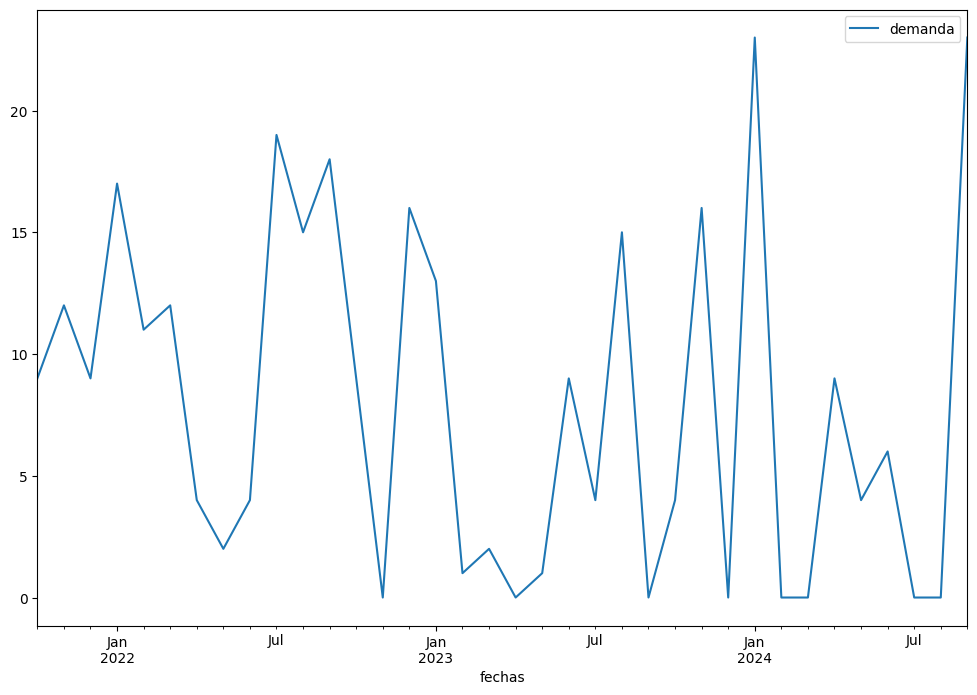

In [3]:
df.plot(figsize=(12,8))
plt.show()

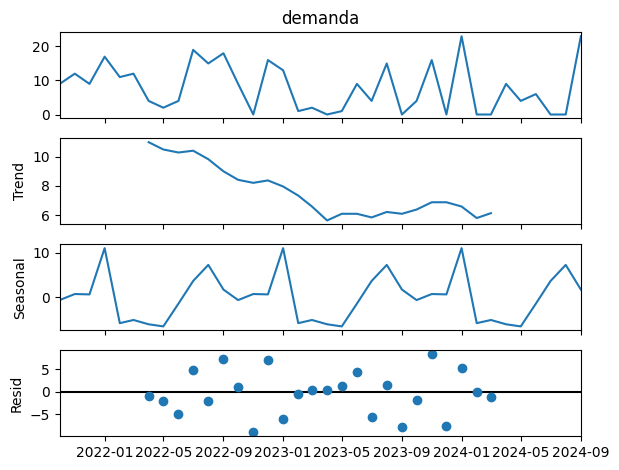

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['demanda'])
results.plot();


In [5]:
len(df)

36

In [6]:
train = df.iloc[:32]
test = df.iloc[32:]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
df.head(),df.tail()

(            demanda
 fechas             
 2021-10-01        9
 2021-11-01       12
 2021-12-01        9
 2022-01-01       17
 2022-02-01       11,
             demanda
 fechas             
 2024-05-01        4
 2024-06-01        6
 2024-07-01        0
 2024-08-01        0
 2024-09-01       23)

In [9]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [10]:
scaled_train[:10]

array([[0.39130435],
       [0.52173913],
       [0.39130435],
       [0.73913043],
       [0.47826087],
       [0.52173913],
       [0.17391304],
       [0.08695652],
       [0.17391304],
       [0.82608696]])

In [11]:
!pip install tensorflow

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
# define generator
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [14]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')


Given the Array: 
[0.39130435 0.52173913 0.39130435 0.73913043 0.47826087 0.52173913
 0.17391304 0.08695652 0.17391304 0.82608696]
Predict this y: 
 [[0.65217391]]


In [15]:
X.shape


(1, 10, 1)

In [16]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [17]:
# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 200)                 │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,801 (632.04 KB)

 Trainable params: 161,801 (632.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# fit model
model.fit(generator,epochs=250)

Epoch 1/250
 5/22 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2844

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1841
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1389
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0976
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1074
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0969
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0990
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1090
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1146
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1226
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0928
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1307
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1470
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0797
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1282
Epoch 15/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0820
E

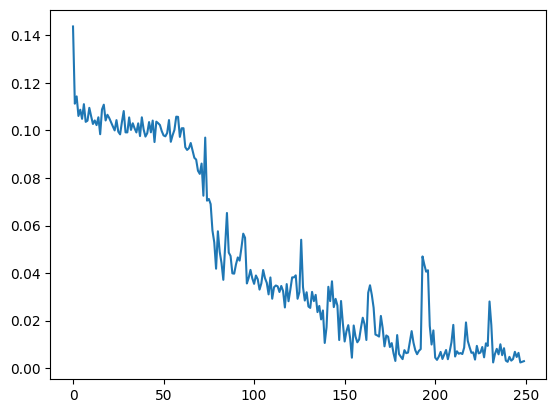

In [20]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [21]:
last_train_batch = scaled_train[-10:]

In [22]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [23]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


array([[0.4486058]], dtype=float32)

In [24]:
scaled_test[0]

array([0.26086957])

In [25]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [26]:
test_predictions

[array([0.4486058], dtype=float32),
 array([-0.04890521], dtype=float32),
 array([0.09765267], dtype=float32),
 array([0.25815362], dtype=float32)]

In [27]:
test.head()

,demanda
fechas,
2024-06-01,6
2024-07-01,0
2024-08-01,0
2024-09-01,23


In [28]:
true_predictions = scaler.inverse_transform(test_predictions)

In [29]:
test['predicciones'] = true_predictions

<ipython-input-29-fe73c52db814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicciones'] = true_predictions


<Axes: xlabel='fechas'>

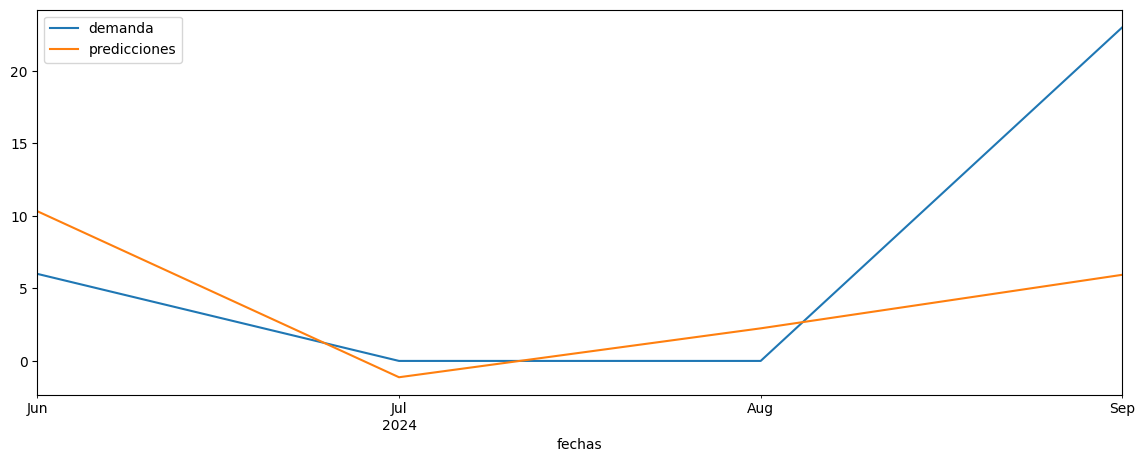

In [30]:
test.plot(figsize=(14,5))

In [31]:
test.head(100)

,demanda,predicciones
fechas,,
2024-06-01,6,10.317934
2024-07-01,0,-1.124820
2024-08-01,0,2.246011
2024-09-01,23,5.937533


In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['demanda'],test['predicciones']))
print(rmse)

8.889349111379277


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

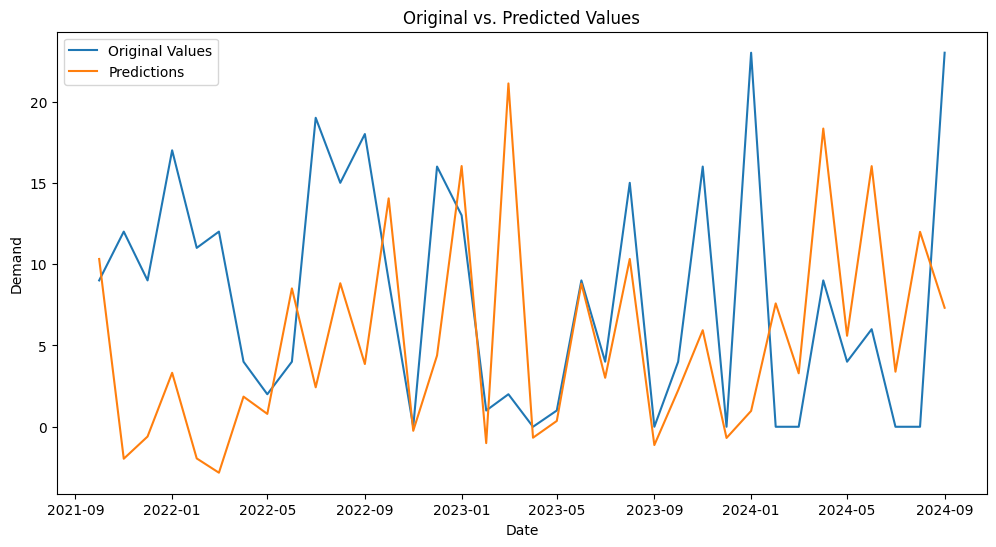

In [33]:
df_with_predictions = df.copy()

all_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# Predict for the entire dataframe (34 values)
for i in range(len(df)):
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    all_predictions.append(current_pred)

    # Instead of using predictions, shift the current batch by one step
    # and add the next actual value from scaled data (if available)
    if i + n_input < len(scaled_train):  # Using training data for initial predictions
        current_batch = np.append(current_batch[:, 1:, :], [[scaled_train[i + n_input]]], axis=1)
    else:
        # For predictions beyond the training data, use the last n_input predictions
        current_batch = np.append(current_batch[:, 1:, :], [[all_predictions[-1]]], axis=1)

# Assuming 'all_predictions' contains the scaled predictions
truee_predictions = scaler.inverse_transform(all_predictions)

# Store predictions in the new DataFrame
df_with_predictions['Predictions'] = truee_predictions

# Plot predictions against original values using the new DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_with_predictions.index, df_with_predictions['demanda'], label='Original Values')
plt.plot(df_with_predictions.index, df_with_predictions['Predictions'], label='Predictions')
plt.legend()
plt.title('Original vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

In [37]:
df_with_predictions.head(50)

,demanda,Predictions
fechas,,
2021-10-01,9,10.317934
2021-11-01,12,-1.965509
2021-12-01,9,-0.601106
2022-01-01,17,3.318531
2022-02-01,11,-1.947093
2022-03-01,12,-2.825574
2022-04-01,4,1.852888
2022-05-01,2,0.791600
2022-06-01,4,8.508351


In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df_with_predictions['demanda'],df_with_predictions['Predictions']))
print(rmse)

9.452252095871389


In [38]:
#df_with_predictions.to_excel('B12.xlsx', index=False)